In [1]:
from IPython.display import Video 
Video("heat_equation_solution.mp4")

In [1]:
import math
from datetime import date
from finmarkets import generate_dates
import numpy as np

def bond_price(N, C, y, start_date=date.today(), maturity_years=4, tenor=0.5):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+y)**dt 
    price += N/(1+y)**dt
    return price

yields = np.arange(0., 1, 0.01)
p = []
for y in yields:
    p.append(bond_price(100, 0.1, y))

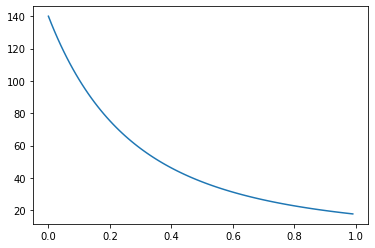

In [2]:
from matplotlib import pyplot as plt

plt.plot(yields, p)
plt.show()

In [13]:
from scipy.optimize import bisect

def ytom(y, N, C, P0, start_date=date.today(), maturity_years=4, tenor=0.5):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+y)**dt 
    price += N/(1+y)**dt - P0
    return price

bis = (bisect(ytom, -0.99, 1, args=(100, 0.1, 92)))
print (bis)

bis2 = (bisect(ytom, -0.99, 1, args=(100, 0.1, 70)))
print (bis2)

0.12998780026036003
0.2272291308958029


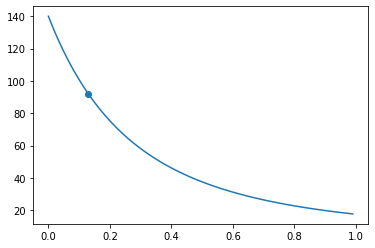

In [4]:
plt.plot(yields, p)
plt.scatter(bis, 92)
plt.show()

In [14]:
def mac_duration(y, N, C, P0, start_date=date.today(), maturity_years=4, tenor=0.5):
    d = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        d += dt*C*tenor*N/(1+y)**dt/P0 
    d += dt*N/(1+y)**dt/P0
    return d

dur = (mac_duration(bis, 100, 0.1, 92))
print (dur)

dur2 = (mac_duration(bis2, 100, 0.1, 70))
print (dur2)

3.364459443102432
3.2542407149473123


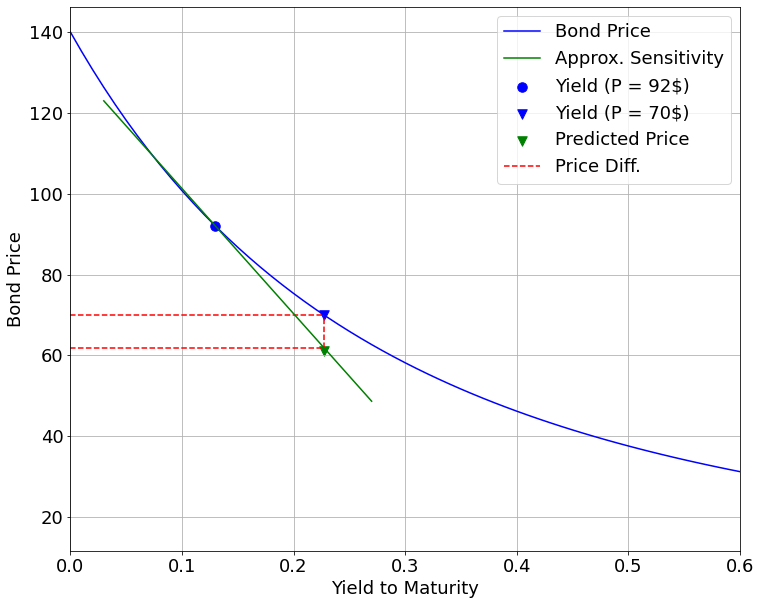

In [63]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 10)
rcParams['font.size'] = 18
plt.plot(yields, p, label="Bond Price", color="blue")
plt.scatter(bis, 92, label="Yield (P = 92$)", s=90, color="blue")
plt.scatter(bis2, 70, label="Yield (P = 70$)", marker="v", s=90, color="blue")
x = np.arange(-0.1, 0.15, 0.01)
yy = 92-92*dur*x
plt.plot(x+bis, yy, color='green', label="Approx. Sensitivity")
plt.scatter(bis2, 61.16, color='green', marker="v", s=90, label="Predicted Price")
plt.vlines(bis2, 61.76, 70, linestyle="--", label="Price Diff.", color="red")
plt.hlines(70, 0, bis2, linestyle="--", color="red")
plt.hlines(61.76, 0, bis2, linestyle="--", color="red")
plt.grid(True)
plt.xlabel("Yield to Maturity")
plt.ylabel("Bond Price")
plt.xlim(0, 0.6)
plt.legend()
plt.show()

In [67]:
from scipy.optimize import bisect 
from datetime import date
from finmarkets import generate_dates

def ytom(y, N, C, P0, start_date, maturity_years, tenor=1):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+y)**dt 
    price += N/(1+y)**dt - P0
    return price
    
today = date.today()
print (bisect(ytom, -0.99, 1, args=(100, 0.05, 95, today, 6, 0.5)))

0.06092598138641734


In [68]:
from scipy.optimize import brentq
    
today = date.today()
print (brentq(ytom, -0.99, 1, args=(100, 0.05, 95, today, 6, 0.5)))


0.060925981384977894


In [77]:
def bond_pv(N, C, r, start_date, maturity_years, tenor=1):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+r)**dt
    price += N/(1+r)**dt
    return price
    
today = date.today()
print (bond_pv(100, 0.1, 0.06, today, 3, 0.5))

111.0756917421273


In [82]:
def bond_pv(N, C, r, start_date, maturity_years, tenor=1):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+r)**dt 
    price += N/(1+r)**dt
    return price
    
def mac_duration(N, C, y, P0, start_date, maturity_years, tenor=1):
    d = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        d += dt*C*tenor*N/(1+y)**dt/P0 
    d += dt*N/(1+y)**dt/P0
    return d

today = date.today()
P0 = bond_pv(100, 0.1, 0.06, today, 3, 0.5)
print ("Bond price: {:.2f}".format(P0))

dur = (mac_duration(100, 0.1, 0.06, P0, today, 3, 0.5))
print ("Duration: {:.2f}".format(dur))


Bond price: 111.08
Duration: 2.69


In [100]:
price = bond_pv(100, 0.1, 0.12, today, 2, 0.5)
print ("Price: {:.3f}".format(price))
dur = mac_duration(100, 0.1, 0.12, price, today, 2, 0.5)
print ("Duration: {:.3f}".format(dur))

dP = -price*dur*0.001
print ("DeltaP: {:.3f}".format(dP))
print ("P+DP: {:.3f}".format(price+dP))

today = date.today()

price = bond_pv(100, 0.1, 0.121, today, 2, 0.5)
print ("Price: {:.3f}".format(price))

Price: 97.117
Duration: 1.859
DeltaP: -0.181
P+DP: 96.936
Price: 96.956
